In [1]:
import numpy as np
import cv2
from PIL import Image
from pylab import *
from scipy import ndimage
from matplotlib import pyplot as plt

In [2]:
from scipy.misc import imresize

In [3]:
img = cv2.imread('376043.jpg')
mask = np.zeros(img.shape[:2], np.uint8)

In [4]:
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [5]:
rect = (10, 56, 255, 400)

In [6]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
img2 = img*mask2[:, :, np.newaxis]

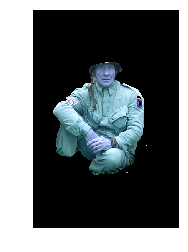

In [7]:
figure()
gray()
imshow(img2)
axis('off')
show()

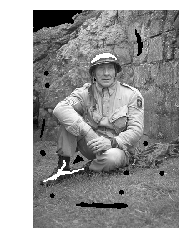

In [8]:
newmask = cv2.imread('newmask.png',0)
figure()
gray()
imshow(newmask)
axis('off')
show()

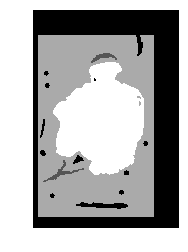

In [9]:
mask[newmask == 0] = 0
mask[newmask == 255] = 1
figure()
gray()
imshow(mask)
axis('off')
show()

In [10]:
mask3, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

In [11]:
mask4 = np.where((mask3==2)|(mask3==0),0,1).astype('uint8')
img4 = img*mask4[:,:,np.newaxis]

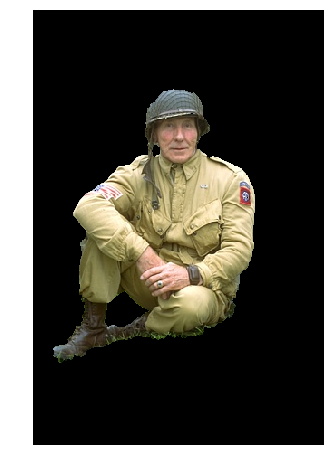

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

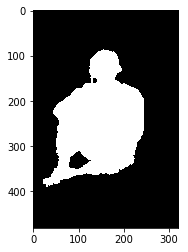

In [13]:
figure()
imshow(mask4)
show()